In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set()

In [72]:
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import normalize
# from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor



from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [73]:
# Look at the file

with open('2019-10-13_ciannovostroyki.csv', 'r') as file:
    for i in range(2):
        print(file.readline())

sep=;

Код;Категория;Название;Тип продажи;Объект продажи;Общая площадь;Жилая площадь;Площадь кухни;Этаж;Этажей в доме;Лифт пассажирский (кол-во);Лифт грузовой (кол-во);Год строительства;Балкон/лоджия;Мусоропровод;Телефон;Парковка;Количество комнат;Тип дома;Название дома (ЖК);Высота потолков;Кол-во раздельных санузлов;Кол-во совмещенных санузлов;Ремонт;Вид из окон;Расстояние до метро;Кол-во квартир в доме;Адрес;Текст объявления;Стоимость;Id Пользователя;ФИО продавца;Телефон продавца;Признак актуальности;Ссылка на объявление;Ссылки на картинки;Дата обновления;Регион Циан



In [74]:
cian_data_full = pd.read_csv('2019-10-13_ciannovostroyki.csv', sep=';',
                             skiprows=1, encoding='cp1251')

In [75]:
cian_data_full.head(3)

,Код,Категория,Название,Тип продажи,Объект продажи,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,...,Текст объявления,Стоимость,Id Пользователя,ФИО продавца,Телефон продавца,Признак актуальности,Ссылка на объявление,Ссылки на картинки,Дата обновления,Регион Циан
0,12034729,Недвижимость в Ногинске/Продажа/Продажа 1-комн...,"1-комн. квартира, 42.2 м2","Свободная продажа, Возможна ипотека",Новостройка,"=""42.2""","=""19.9""","=""11.0""",2,3,...,Продается однокомнатная квартира в новостройке...,2850000,277143.0,NaN,7.965219e+10,Опубликовано,https://noginsk.cian.ru/sale/flat/12034729/,https://cdn-p.cian.site/images/4/892/911/novos...,08.10.2019 13:56:39,Богородский
1,12695191,Недвижимость в Москве/Продажа/Продажа 2-комнат...,"2-комн. квартира, 70.03 м2",", Возможна ипотека",Новостройка,"=""70.03""","=""41.8""","=""13.7""",2,17,...,Продается просторная двухкомнатная квартира 70...,7073030,389766.0,ИНКОМ-Новостройки,7.495163e+10,Опубликовано,https://www.cian.ru/sale/flat/12695191/,https://cdn-p.cian.site/images/3/824/736/novos...,11.10.2019 9:25:04,Москва
2,12722545,Недвижимость в Москве/Продажа/Продажа 3-комнат...,"3-комн. квартира, 76.47 м2",", Возможна ипотека",Новостройка,"=""76.47""","=""43.4""","=""11.2""",11,17,...,"Продается трехкомнатная квартира 76,47 кв.м с ...",7799940,389766.0,ИНКОМ-Новостройки,7.495163e+10,Опубликовано,https://www.cian.ru/sale/flat/12722545/,https://cdn-p.cian.site/images2/5/690/176/novo...,11.10.2019 6:45:06,Москва


In [76]:
cian_data_full.shape

(37400, 38)

In [77]:
cian_data_full.duplicated().sum()

93

In [78]:
cian_data_full.drop_duplicates(inplace=True)

In [79]:
cian_data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37307 entries, 0 to 37399
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Код                          37307 non-null  int64  
 1   Категория                    37307 non-null  object 
 2   Название                     37307 non-null  object 
 3   Тип продажи                  36703 non-null  object 
 4   Объект продажи               37307 non-null  object 
 5   Общая площадь                37307 non-null  object 
 6   Жилая площадь                37307 non-null  object 
 7   Площадь кухни                37307 non-null  object 
 8   Этаж                         37307 non-null  int64  
 9   Этажей в доме                37307 non-null  int64  
 10  Лифт пассажирский (кол-во)   35891 non-null  float64
 11  Лифт грузовой (кол-во)       35610 non-null  float64
 12  Год строительства            257 non-null    float64
 13  Балкон/лоджия   

In [80]:
# How many missing in percent

(cian_data_full.isna().sum() / cian_data_full.shape[0]) * 100 

Код                              0.000000
Категория                        0.000000
Название                         0.000000
Тип продажи                      1.618999
Объект продажи                   0.000000
Общая площадь                    0.000000
Жилая площадь                    0.000000
Площадь кухни                    0.000000
Этаж                             0.000000
Этажей в доме                    0.000000
Лифт пассажирский (кол-во)       3.795534
Лифт грузовой (кол-во)           4.548744
Год строительства               99.311121
Балкон/лоджия                   81.679041
Мусоропровод                     0.000000
Телефон                          0.000000
Парковка                        11.413408
Количество комнат                6.497440
Тип дома                         0.694240
Название дома (ЖК)               0.544134
Высота потолков                 55.817943
Кол-во раздельных санузлов      22.419385
Кол-во совмещенных санузлов    100.000000
Ремонт                          98

In [81]:
# Drop with > 70% of missing

missing_percents = (cian_data_full.isna().sum() / cian_data_full.shape[0]) * 100
drop_columns = missing_percents[missing_percents > 70].index.to_list()
drop_columns

['Год строительства',
 'Балкон/лоджия',
 'Кол-во совмещенных санузлов',
 'Ремонт',
 'Кол-во квартир в доме']

In [82]:
# How many unique values. In total - 37400 entries.

for colname in cian_data_full.columns:
    print(f'{colname} : {len(cian_data_full[colname].unique())}')

Код : 37307
Категория : 3650
Название : 7211
Тип продажи : 8
Объект продажи : 2
Общая площадь : 4603
Жилая площадь : 731
Площадь кухни : 371
Этаж : 68
Этажей в доме : 65
Лифт пассажирский (кол-во) : 13
Лифт грузовой (кол-во) : 13
Год строительства : 58
Балкон/лоджия : 3
Мусоропровод : 2
Телефон : 2
Парковка : 4
Количество комнат : 7
Тип дома : 6
Название дома (ЖК) : 777
Высота потолков : 67
Кол-во раздельных санузлов : 6
Кол-во совмещенных санузлов : 1
Ремонт : 5
Вид из окон : 4
Расстояние до метро : 139
Кол-во квартир в доме : 343
Адрес : 2340
Текст объявления : 27209
Стоимость : 30013
Id Пользователя : 2800
ФИО продавца : 1146
Телефон продавца : 2921
Признак актуальности : 3
Ссылка на объявление : 37307
Ссылки на картинки : 33055
Дата обновления : 11467
Регион Циан : 60


In [83]:
# Drop also an uninformative columns

drop_columns.extend(['Код', 'Текст объявления', 'Ссылка на объявление', 
                     'Ссылки на картинки', 'Телефон продавца', 'Id Пользователя', 
                     'Категория', 'Название'])

In [84]:
drop_columns

['Год строительства',
 'Балкон/лоджия',
 'Кол-во совмещенных санузлов',
 'Ремонт',
 'Кол-во квартир в доме',
 'Код',
 'Текст объявления',
 'Ссылка на объявление',
 'Ссылки на картинки',
 'Телефон продавца',
 'Id Пользователя',
 'Категория',
 'Название']

In [85]:
cian_data = cian_data_full.drop(drop_columns, axis=1)

### Look at the features

In [86]:
cian_data.head().T

,0,1,2,3,4
Тип продажи,"Свободная продажа, Возможна ипотека",", Возможна ипотека",", Возможна ипотека",NaN,", Возможна ипотека"
Объект продажи,Новостройка,Новостройка,Новостройка,Новостройка,Новостройка
Общая площадь,"=""42.2""","=""70.03""","=""76.47""","=""60.0""","=""65.2"""
Жилая площадь,"=""19.9""","=""41.8""","=""43.4""","=""38.0""","="""""
Площадь кухни,"=""11.0""","=""13.7""","=""11.2""","=""12.0""","="""""
Этаж,2,2,11,5,2
Этажей в доме,3,17,17,20,5
Лифт пассажирский (кол-во),NaN,1,1,2,0
Лифт грузовой (кол-во),NaN,1,1,2,1
Мусоропровод,Нет,Да,Да,Нет,Нет


In [87]:
print(
    cian_data['Тип продажи'].str.split(',', expand=True)[0].value_counts(),
    '\n\n',
    cian_data['Тип продажи'].str.split(',', expand=True)[1].value_counts()
)


Долевое участие (214-ФЗ)    29156
                             4052
Свободная продажа            3451
Альтернатива                   44
Name: 0, dtype: int64 

  Возможна ипотека    36291
Name: 1, dtype: int64


In [88]:
# Extract data for the following features: 
# [Общая площадь, Жилая площадь, Площадь кухни]

cian_data['Общая площадь'].str.strip('=\"').astype('float')

0         42.20
1         70.03
2         76.47
3         60.00
4         65.20
          ...  
37395     62.50
37396     80.40
37397     84.00
37398    104.90
37399     72.71
Name: Общая площадь, Length: 37307, dtype: float64

In [89]:
cian_data['Парковка'].value_counts()

подземная     15653
Неизвестно    15145
Наземная       2251
Name: Парковка, dtype: int64

In [90]:
# Ceiling height 99 meters looks unusual

cian_data['Высота потолков'].value_counts()

3.000     2772
2.650     2054
2.700     1612
2.800     1526
3.100     1005
          ... 
6.100        1
2.400        1
99.999       1
4.800        1
3.950        1
Name: Высота потолков, Length: 66, dtype: int64

In [91]:
cian_data['Расстояние до метро'].str.split('.', expand=True)

,0,1
0,NaN,NaN
1,12 мин,на транспорте
2,12 мин,на транспорте
3,3 мин,на транспорте
4,NaN,NaN
...,...,...
37395,NaN,NaN
37396,23 мин,на транспорте
37397,NaN,NaN
37398,NaN,NaN


In [92]:
cian_data['Признак актуальности'].value_counts()

Опубликовано          33161
Неизвестно             3882
Cнято с публикации      264
Name: Признак актуальности, dtype: int64

In [93]:
cian_data['Регион Циан'].value_counts().head(20)

Москва            26680
Люберецкий         1549
Одинцовский        1262
Ленинский          1093
Мытищи             1038
Балашихинский       974
Химки               819
Красногорск         766
Красногорский       566
Пушкинский          341
Истра               249
Наро-Фоминский      187
Солнечногорск       180
Раменский           178
Королев             162
Люберцы             134
Богородский         118
Реутов               99
Дмитровский          88
Электросталь         78
Name: Регион Циан, dtype: int64

#### Look at the date

In [94]:
cian_data_datetime = pd.to_datetime(cian_data['Дата обновления'])

In [95]:
cian_data_datetime.dt.year.value_counts()

2019    37232
2018       61
2017       13
2016        1
Name: Дата обновления, dtype: int64

(0, 100000000.0)

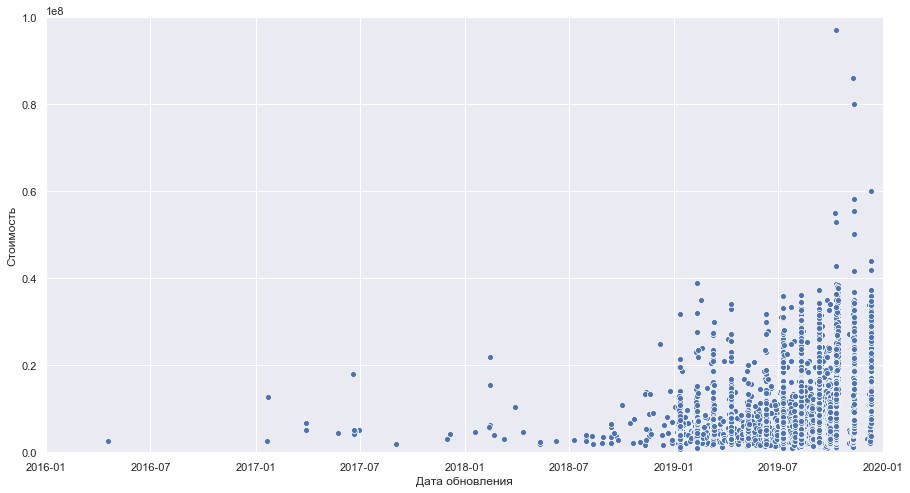

In [96]:
plt.figure(figsize=(15,8))
axes = sns.scatterplot(cian_data_datetime, cian_data['Стоимость'])

axes.set_xlim([pd.to_datetime('20160101', format='%Y%m%d'), 
               pd.to_datetime('20200101', format='%Y%m%d')])
axes.set_ylim(0, 1.0 * 10**8)

### Prepare some features

#### Prepare the feature ["Тип продажи"]

In [97]:
cian_data_type_sale = cian_data['Тип продажи'].str.split(',', expand=True)
for feature in cian_data_type_sale.columns:
    cian_data_type_sale[feature] = cian_data_type_sale[feature].str.strip()

In [98]:
(cian_data_type_sale[0].value_counts().index.to_list() + 
 cian_data_type_sale[1].value_counts().index.to_list())

['Долевое участие (214-ФЗ)',
 '',
 'Свободная продажа',
 'Альтернатива',
 'Возможна ипотека']

In [99]:
# Replace '' by NaN

cian_data_type_sale[0] = cian_data_type_sale[0].map(lambda x: [x, np.nan][x == ''])
cian_data_type_sale[1] = cian_data_type_sale[1].map(lambda x: [x, np.nan][x == ''])

In [100]:
cian_data_type_sale.isnull().sum()

0    4656
1    1016
dtype: int64

In [101]:
cian_data_type_sale = pd.get_dummies(cian_data_type_sale, prefix='', prefix_sep='')
cian_data_type_sale.head()

,Альтернатива,Долевое участие (214-ФЗ),Свободная продажа,Возможна ипотека
0,0,0,1,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,0
4,0,0,0,1


#### Prepare the feature ["Площадь"]

In [102]:
cian_data['Общая площадь'].str.strip('=\"').astype('float')

0         42.20
1         70.03
2         76.47
3         60.00
4         65.20
          ...  
37395     62.50
37396     80.40
37397     84.00
37398    104.90
37399     72.71
Name: Общая площадь, Length: 37307, dtype: float64

In [103]:
# Join the features and replace '' by NaN

cian_data_areas = pd.DataFrame()
area_features = ['Общая площадь', 'Жилая площадь', 'Площадь кухни']
for column in area_features:
    cian_data_areas[column] = (cian_data[column].str.strip('=\"')
                               .replace('', np.nan)
                               .astype('float'))

In [104]:
cian_data_areas.head()

,Общая площадь,Жилая площадь,Площадь кухни
0,42.20,19.9,11.0
1,70.03,41.8,13.7
2,76.47,43.4,11.2
3,60.00,38.0,12.0
4,65.20,NaN,NaN


In [105]:
cian_data_areas.isna().nunique()

Общая площадь    1
Жилая площадь    2
Площадь кухни    2
dtype: int64

#### Prepare the features ['Площадь кухни', 'Жилая площадь'] if necessary

In [106]:
# Find the average kitchen size. The rest is the size of the living room

kitchen_area_median = cian_data_areas['Площадь кухни'].median()
kitchen_area_median

13.8

In [107]:
# Replace the missing values for the kitchen

cian_data_areas.fillna(value={'Площадь кухни': kitchen_area_median}, inplace=True)

In [108]:
cian_data_areas

,Общая площадь,Жилая площадь,Площадь кухни
0,42.20,19.9,11.0
1,70.03,41.8,13.7
2,76.47,43.4,11.2
3,60.00,38.0,12.0
4,65.20,NaN,13.8
...,...,...,...
37395,62.50,34.0,9.6
37396,80.40,40.8,12.3
37397,84.00,45.0,12.5
37398,104.90,60.0,13.8


In [109]:
# Replace missing values for the living room

for index, _ in (cian_data_areas['Жилая площадь']
                 [cian_data_areas['Жилая площадь'].isna()].items()):
    
    replace_value = (cian_data_areas['Общая площадь'][index] -
                     cian_data_areas['Площадь кухни'][index])
    
    cian_data_areas['Жилая площадь'][index] = replace_value

In [110]:
cian_data_areas.isnull().sum()

Общая площадь    0
Жилая площадь    0
Площадь кухни    0
dtype: int64

### "Numeric features"

In [111]:
# Look at the numeric features

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cian_data.select_dtypes(include=numerics).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37307 entries, 0 to 37399
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Этаж                        37307 non-null  int64  
 1   Этажей в доме               37307 non-null  int64  
 2   Лифт пассажирский (кол-во)  35891 non-null  float64
 3   Лифт грузовой (кол-во)      35610 non-null  float64
 4   Количество комнат           34883 non-null  float64
 5   Высота потолков             16483 non-null  float64
 6   Кол-во раздельных санузлов  28943 non-null  float64
 7   Стоимость                   37307 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 2.6 MB


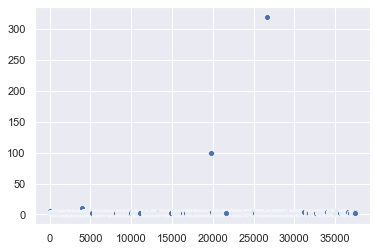

In [114]:
# Ceiling height more 6.5 meters is unusual

sns.scatterplot(cian_data['Высота потолков'].index, cian_data['Высота потолков'].values)

In [125]:
# Drop unusual ceiling height

drop_indexes_height = cian_data[cian_data['Высота потолков'] > 6.5].index
print(cian_data.loc[drop_indexes_height]['Высота потолков'])
cian_data.drop(drop_indexes_height, inplace=True)

4005      10.000
19840     99.999
26670    320.000
Name: Высота потолков, dtype: float64


In [126]:
cian_data_height_medium = cian_data['Высота потолков'].median()

In [128]:
# Fill another missing values

cian_data.select_dtypes(include=numerics).fillna(
    value={
        'Лифт пассажирский (кол-во)': 0,
        'Лифт грузовой (кол-во)': 0,
        'Количество комнат': 1,
        'Высота потолков': cian_data_height_medium,
        'Кол-во раздельных санузлов': 0}, 
    inplace=True
)

In [137]:
# More than 5 floors and no elevator seems unusual

cian_data_numerics = cian_data.select_dtypes(include=numerics)
cian_data_numerics[(cian_data_numerics['Этажей в доме'] > 5) &
    (cian_data_numerics['Лифт пассажирский (кол-во)'] == 0)].count()


Этаж                          329
Этажей в доме                 329
Лифт пассажирский (кол-во)    329
Лифт грузовой (кол-во)        328
Количество комнат             289
Высота потолков                12
Кол-во раздельных санузлов    314
Стоимость                     329
dtype: int64

In [142]:
cian_data_numerics.head()

,Этаж,Этажей в доме,Лифт пассажирский (кол-во),Лифт грузовой (кол-во),Количество комнат,Высота потолков,Кол-во раздельных санузлов,Стоимость
0,2,3,NaN,NaN,1.0,NaN,1.0,2850000
1,2,17,1.0,1.0,2.0,NaN,1.0,7073030
2,11,17,1.0,1.0,3.0,NaN,1.0,7799940
3,5,20,2.0,2.0,2.0,NaN,2.0,11700000
4,2,5,0.0,1.0,2.0,NaN,0.0,6055000


In [156]:
# Replace from 0 to 1 elevator in houses with more than 5 floors

indexes_no_elevators = (cian_data_numerics['Этажей в доме'].gt(5) & 
                        cian_data_numerics['Лифт пассажирский (кол-во)'].eq(0))
cian_data_numerics.loc[indexes_no_elevators, 'Лифт пассажирский (кол-во)'] = 1

In [159]:
# Check

(cian_data_numerics[cian_data_numerics['Этажей в доме'] > 5]
     ['Лифт пассажирский (кол-во)'].value_counts())

1.0     28231
2.0      5922
3.0       505
6.0       170
4.0       108
8.0        49
9.0        11
5.0         8
12.0        5
15.0        1
10.0        1
Name: Лифт пассажирский (кол-во), dtype: int64

### Look at categorical features

In [160]:
# The features without missing values

full_filled_features = ['Объект продажи', 'Мусоропровод', 'Телефон', 'Адрес', 
              'Признак актуальности', 'Дата обновления', 'Регион Циан']
already_prepared_features = area_features + ['Тип продажи'] + full_filled_features

# Check
cian_data[full_filled_features].isnull().any()

Объект продажи          False
Мусоропровод            False
Телефон                 False
Адрес                   False
Признак актуальности    False
Дата обновления         False
Регион Циан             False
dtype: bool

In [161]:
(cian_data.select_dtypes(exclude=numerics)
     .drop(already_prepared_features, axis=1)
     .isnull().any())

Парковка               True
Тип дома               True
Название дома (ЖК)     True
Вид из окон            True
Расстояние до метро    True
ФИО продавца           True
dtype: bool

In [162]:
cian_data_categorical = (cian_data.select_dtypes(exclude=numerics)
                         .drop(already_prepared_features, axis=1))
cian_data_categorical.describe()

,Парковка,Тип дома,Название дома (ЖК),Вид из окон,Расстояние до метро,ФИО продавца
count,33049,37046,37103,17677,35315,32911
unique,3,5,775,3,138,1144
top,подземная,Монолитный,ЖК «Хорошевский»,Во двор,2 мин. на транспорте,ПИК
freq,15653,32359,1158,8422,5632,6198


In [163]:
# Look at the most frequent values

cian_data_categorical.mode().iloc[0]

Парковка                          подземная
Тип дома                         Монолитный
Название дома (ЖК)         ЖК «Хорошевский»
Вид из окон                         Во двор
Расстояние до метро    2 мин. на транспорте
ФИО продавца                            ПИК
Name: 0, dtype: object

In [164]:
# Replace the missing values

cian_data_categorical = cian_data_categorical.fillna(value={
    'Парковка': 'Неизвестно',
    'Тип дома': 'Монолитный',
    'Название дома (ЖК)': 'Другое',
    'Вид из окон': 'Во двор',
    'ФИО продавца': 'Другое'
})
cian_data_categorical

,Парковка,Тип дома,Название дома (ЖК),Вид из окон,Расстояние до метро,ФИО продавца
0,Неизвестно,Кирпичный,ЖК «Маяковского»,Во двор,NaN,Другое
1,подземная,Монолитный,ЖК «Белая звезда»,Во двор,12 мин. на транспорте,ИНКОМ-Новостройки
2,подземная,Монолитный,ЖК «Белая звезда»,Во двор,12 мин. на транспорте,ИНКОМ-Новостройки
3,Неизвестно,Монолитный,ЖК «Хорошевский»,На улицу и двор,3 мин. на транспорте,Другое
4,подземная,Монолитный,ЖК «Рублевское предместье»,На улицу и двор,NaN,Другое
...,...,...,...,...,...,...
37395,Неизвестно,Кирпичный,ЖК «Павловский квартал»,На улицу и двор,NaN,Русфинриэлти
37396,Неизвестно,Кирпичный,ЖК «Павловский квартал»,На улицу и двор,23 мин. на транспорте,Русфинриэлти
37397,Неизвестно,Кирпичный,ЖК «Павловский квартал»,На улицу и двор,NaN,Русфинриэлти
37398,Неизвестно,Монолитный,ЖК «Эдельвейс-Комфорт»,На улицу и двор,NaN,Другое


In [165]:
cian_data_sub_distance = cian_data['Расстояние до метро'].str.split('.', expand=True)
cian_data_sub_distance_time = cian_data_sub_distance[0].str.rstrip(' мин').astype(float)
cian_data_sub_distance_time.name = 'Время до метро'

# Save 1/0 filter mask 
cian_data_sub_distance_filter = cian_data_sub_distance_time.isna()
cian_data_sub_distance_filter.name = 'Пропущено время'

cian_data_sub_distance_time.value_counts().sort_index()

0.0         5
1.0       433
2.0      6097
3.0      4824
4.0      2013
         ... 
102.0       5
106.0       2
108.0       4
113.0       3
118.0      23
Name: Время до метро, Length: 88, dtype: int64

In [166]:
cian_data_sub_distance_type = cian_data_sub_distance[1].str.strip()
cian_data_sub_distance_type.name = 'Тип маршрута'
cian_data_sub_distance_type.value_counts(dropna=False)

на транспорте    22758
пешком           12557
NaN               1989
Name: Тип маршрута, dtype: int64

In [167]:
# Fill the missing time by a random value from 99 percentile 
# (99% events included) to maximum value: [40, 118]

max_random_time = cian_data_sub_distance_time.max()
min_random_time = cian_data_sub_distance_time.quantile(0.99)

cian_data_sub_distance_time[cian_data_sub_distance_filter] = (
    np.random.randint(min_random_time, max_random_time, 
    size=cian_data_sub_distance_filter.shape[0]))

In [168]:
# Check
cian_data_sub_distance_time[cian_data_sub_distance_filter]

0         59.0
4        108.0
7         86.0
9         51.0
10        47.0
         ...  
37393     60.0
37394     87.0
37395     61.0
37397     59.0
37398     71.0
Name: Время до метро, Length: 1989, dtype: float64

In [169]:
# Fill the missing type by the worst type

cian_data_sub_distance_type.fillna('на транспорте', inplace=True)

### Join results

In [170]:
cian_data_filled = pd.concat((
        cian_data_type_sale,
        cian_data_areas,
        cian_data_numerics,
        cian_data_categorical.drop('Расстояние до метро', axis=1),
        cian_data_sub_distance_time,
        cian_data_sub_distance_type,
        cian_data_sub_distance_filter.map(int),
        cian_data[full_filled_features]),
    axis=1
)

In [171]:
cian_data_filled.T

,0,1,2,3,4,5,6,7,8,9,...,37390,37391,37392,37393,37394,37395,37396,37397,37398,37399
Альтернатива,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Долевое участие (214-ФЗ),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Свободная продажа,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Возможна ипотека,1,1,1,0,1,1,1,0,1,1,...,1,0,1,1,1,1,1,1,0,1
Общая площадь,42.2,70.03,76.47,60,65.2,38.18,44,29,100,35,...,39.2,136.6,44.41,59.7,58.6,62.5,80.4,84,104.9,72.71
Жилая площадь,19.9,41.8,43.4,38,51.4,17.3,17.5,19,50,18,...,17.8,72.5,18.4,34.3,34.3,34,40.8,45,60,33
Площадь кухни,11,13.7,11.2,12,13.8,8.1,12.2,13.8,27,11,...,9.5,19,10.9,10.3,10.3,9.6,12.3,12.5,13.8,16.5
Этаж,2,2,11,5,2,1,2,14,2,1,...,4,3,1,3,1,3,3,3,10,1
Этажей в доме,3,17,17,20,5,3,5,17,12,3,...,22,21,3,3,3,3,3,3,20,3
Лифт пассажирский (кол-во),NaN,1,1,2,0,NaN,1,1,2,NaN,...,1,2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [172]:
# Save prepared data

cian_data_filled.to_csv('cian_data_filled.csv')

#### Read

In [173]:
cian_data_filled = pd.read_csv('cian_data_filled.csv', index_col=0)

In [174]:
cian_data_filled.head()

,Альтернатива,Долевое участие (214-ФЗ),Свободная продажа,Возможна ипотека,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Лифт пассажирский (кол-во),...,Время до метро,Тип маршрута,Пропущено время,Объект продажи,Мусоропровод,Телефон,Адрес,Признак актуальности,Дата обновления,Регион Циан
0,0,0,1,1,42.20,19.9,11.0,2.0,3.0,NaN,...,59.0,на транспорте,1.0,Новостройка,Нет,Нет,"Московская область,Богородский городской округ...",Опубликовано,08.10.2019 13:56:39,Богородский
1,0,0,0,1,70.03,41.8,13.7,2.0,17.0,1.0,...,12.0,на транспорте,0.0,Новостройка,Да,Нет,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Опубликовано,11.10.2019 9:25:04,Москва
2,0,0,0,1,76.47,43.4,11.2,11.0,17.0,1.0,...,12.0,на транспорте,0.0,Новостройка,Да,Нет,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Опубликовано,11.10.2019 6:45:06,Москва
3,0,0,0,0,60.00,38.0,12.0,5.0,20.0,2.0,...,3.0,на транспорте,0.0,Новостройка,Нет,Нет,"Москва,СЗАО,район Хорошево-Мневники,3-я Хороше...",Опубликовано,11.10.2019 16:30:13,Москва
4,0,0,0,1,65.20,51.4,13.8,2.0,5.0,0.0,...,108.0,на транспорте,1.0,Новостройка,Нет,Нет,"Московская область,Красногорск городской округ...",Опубликовано,09.10.2019 19:10:04,Красногорск


### Look at dependencies

#### Look at numeric features

In [175]:
num_columns = ['Общая площадь', 'Жилая площадь', 'Площадь кухни',
    'Этаж', 'Этажей в доме', 'Лифт пассажирский (кол-во)', 'Лифт грузовой (кол-во)',
    'Количество комнат', 'Высота потолков', 'Кол-во раздельных санузлов','Время до метро',
    'Стоимость']

In [ ]:
sns.pairplot(cian_data_filled[num_columns])

In [ ]:
feature_correlation = cian_data_filled.corr(method='pearson')
plt.figure(figsize=(12,6))
sns.heatmap(feature_correlation, annot=True)

In [ ]:
plt.figure(figsize=(15,6))
sns.regplot(cian_data_filled["Общая площадь"],
            cian_data_filled["Стоимость"],
            line_kws={'color': 'royalblue'})
sns.regplot(cian_data_filled["Жилая площадь"],
            cian_data_filled["Стоимость"],
            line_kws={'color': 'darkorange'})
sns.regplot(cian_data_filled["Площадь кухни"],
            cian_data_filled["Стоимость"], 
            line_kws={'color': 'limegreen'})

In [ ]:
# Several points looks like outlier. Drop them. 

cian_data_filled = cian_data_filled[~(cian_data_filled['Стоимость'] > 0.8 * 10**8)]
cian_data_filled = cian_data_filled[~(cian_data_filled['Общая площадь'] > 300)]


In [ ]:
plt.figure(figsize=(15,6))
sns.regplot(cian_data_filled["Общая площадь"],
            cian_data_filled["Стоимость"],
            line_kws={'color': 'royalblue'})
sns.regplot(cian_data_filled["Жилая площадь"],
            cian_data_filled["Стоимость"],
            line_kws={'color': 'darkorange'})
sns.regplot(cian_data_filled["Площадь кухни"],
            cian_data_filled["Стоимость"], 
            line_kws={'color': 'limegreen'})

In [ ]:
plt.figure(figsize=(12,5))
sns.regplot(cian_data_filled["Этаж"],
            cian_data_filled["Стоимость"],
            line_kws={'color': 'darkorange'})

In [ ]:
plt.figure(figsize=(12,5))
sns.regplot(cian_data_filled["Высота потолков"],
            cian_data_filled["Стоимость"],
            line_kws={'color': 'darkorange'})

In [ ]:
plt.figure(figsize=(12,5))
sns.regplot(cian_data_filled["Время до метро"],
            cian_data_filled["Стоимость"],
            line_kws={'color': 'darkorange'})

In [197]:
# Multiply the type 'by foot' on ~4.
# This way we can merge the columns with two types.

cian_data_filled_copy = cian_data_filled[[
    'Время до метро', 'Тип маршрута', 'Стоимость']].copy()
choosen_indexes = cian_data_filled_copy[cian_data_filled_copy['Тип маршрута'] == 'на транспорте'].index

cian_data_filled_copy.loc[choosen_indexes, 'Время до метро'] = (
        cian_data_filled_copy.loc[choosen_indexes, 'Время до метро'] * 4)

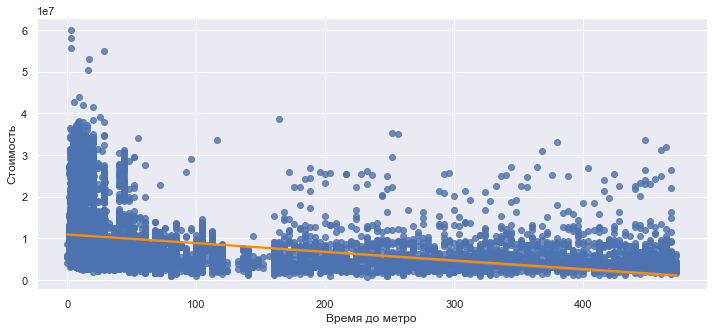

In [198]:
plt.figure(figsize=(12,5))
sns.regplot(cian_data_filled_copy["Время до метро"],
            cian_data_filled_copy["Стоимость"],
            line_kws={'color': 'darkorange'})

Text(0, 0.5, 'Стоимость')

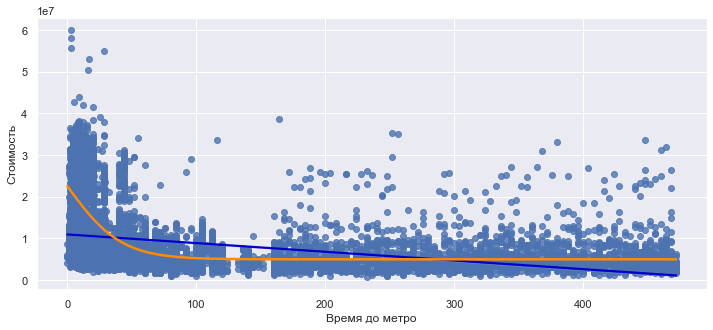

In [199]:
# Fit the 'time to subway' distribution

# import scipy

def fit_time_to_sub(x, a, b, c):
    return (a / (1 + np.exp(b*x))) + c


p0 = (-3.5 * 10**7, -0.048, 4 * 10**7)


# Here we already found the parameters
pars = p0
    
    
# pars, _ = scipy.optimize.curve_fit(
#     fit_time_to_sub, cian_data_filled_copy["Время до метро"],  
#     cian_data_filled_copy["Стоимость"], p0=p0)
# print(pars)


plt.figure(figsize=(12,5))

sns.regplot(cian_data_filled_copy["Время до метро"],
            cian_data_filled_copy["Стоимость"],
            line_kws={'color': 'mediumblue'})
ax = sns.lineplot(
    cian_data_filled_copy["Время до метро"],
    fit_time_to_sub(cian_data_filled_copy["Время до метро"], *pars),
    color='darkorange',
    linewidth=2.5)
ax.set_ylabel('Стоимость')

In [200]:
# Add the fit as column

fit_time_price_series = pd.Series(
    fit_time_to_sub(cian_data_filled_copy["Время до метро"], *p0))
fit_time_price_series.name = 'Цена от времени'
fit_time_price_series

cian_data_filled = cian_data_filled.join(fit_time_price_series)
cian_data_filled

,Альтернатива,Долевое участие (214-ФЗ),Свободная продажа,Возможна ипотека,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Лифт пассажирский (кол-во),...,Тип маршрута,Пропущено время,Объект продажи,Мусоропровод,Телефон,Адрес,Признак актуальности,Дата обновления,Регион Циан,Цена от времени
0,0,0,1,1,42.20,19.9,11.0,2,3,0.0,...,на транспорте,1,Новостройка,Нет,Нет,"Московская область,Богородский городской округ...",Опубликовано,08.10.2019 13:56:39,Богородский,5.006190e+06
1,0,0,0,1,70.03,41.8,13.7,2,17,1.0,...,на транспорте,0,Новостройка,Да,Нет,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Опубликовано,11.10.2019 9:25:04,Москва,8.177728e+06
2,0,0,0,1,76.47,43.4,11.2,11,17,1.0,...,на транспорте,0,Новостройка,Да,Нет,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Опубликовано,11.10.2019 6:45:06,Москва,8.177728e+06
3,0,0,0,0,60.00,38.0,12.0,5,20,2.0,...,на транспорте,0,Новостройка,Нет,Нет,"Москва,СЗАО,район Хорошево-Мневники,3-я Хороше...",Опубликовано,11.10.2019 16:30:13,Москва,1.759487e+07
4,0,0,0,1,65.20,51.4,13.8,2,5,0.0,...,на транспорте,1,Новостройка,Нет,Нет,"Московская область,Красногорск городской округ...",Опубликовано,09.10.2019 19:10:04,Красногорск,5.007500e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37395,0,0,0,1,62.50,34.0,9.6,3,3,0.0,...,на транспорте,1,Новостройка,Нет,Нет,"Московская область,Истра городской округ,д. Ло...",Опубликовано,08.10.2019 17:17:15,Истра,5.000020e+06
37396,0,0,0,1,80.40,40.8,12.3,3,3,0.0,...,на транспорте,0,Новостройка,Нет,Нет,"Московская область,Истра городской округ,д. Ло...",Опубликовано,08.10.2019 17:17:20,Истра,5.417838e+06
37397,0,0,0,1,84.00,45.0,12.5,3,3,0.0,...,на транспорте,1,Новостройка,Нет,Нет,"Московская область,Истра городской округ,д. Ис...",Опубликовано,08.10.2019 17:17:25,Истра,5.000024e+06
37398,0,0,1,0,104.90,60.0,13.8,10,20,1.0,...,на транспорте,1,Новостройка,Да,Да,"Московская область,Балашиха,улица Чистопольска...",Опубликовано,09.10.2019 14:25:06,Балашихинский,5.013339e+06


#### Look at price and inflation

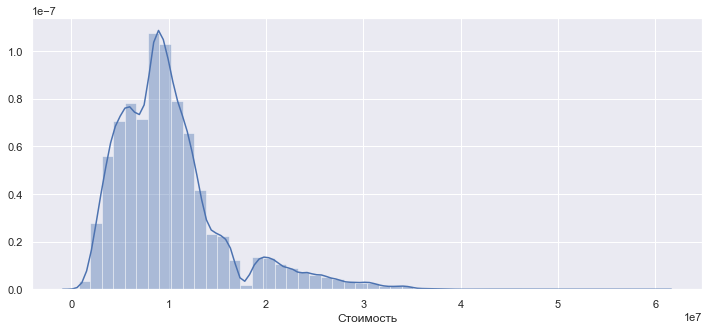

In [201]:
plt.figure(figsize=(12,5))
sns.distplot(cian_data_filled["Стоимость"])

In [202]:
# Convert to datetime type

cian_data_filled['Дата обновления'] = pd.to_datetime(cian_data_filled['Дата обновления'])

In [203]:
cian_data_filled['Дата обновления']

0       2019-08-10 13:56:39
1       2019-11-10 09:25:04
2       2019-11-10 06:45:06
3       2019-11-10 16:30:13
4       2019-09-10 19:10:04
                ...        
37395   2019-08-10 17:17:15
37396   2019-08-10 17:17:20
37397   2019-08-10 17:17:25
37398   2019-09-10 14:25:06
37399   2019-08-10 17:12:39
Name: Дата обновления, Length: 37299, dtype: datetime64[ns]

(735964.0, 737425.0)

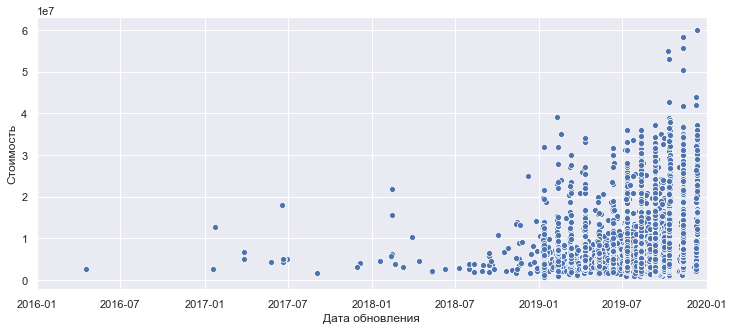

In [204]:
plt.figure(figsize=(12,5))

axes = sns.scatterplot(cian_data_filled['Дата обновления'], cian_data_filled['Стоимость'])

axes.set_xlim([pd.to_datetime('20160101', format='%Y%m%d', errors='ignore'), 
               pd.to_datetime('20200101', format='%Y%m%d', errors='ignore')])
# axes.set_ylim(0, 0.6 * 10**8)

Text(0, 0.5, 'Стоимость')

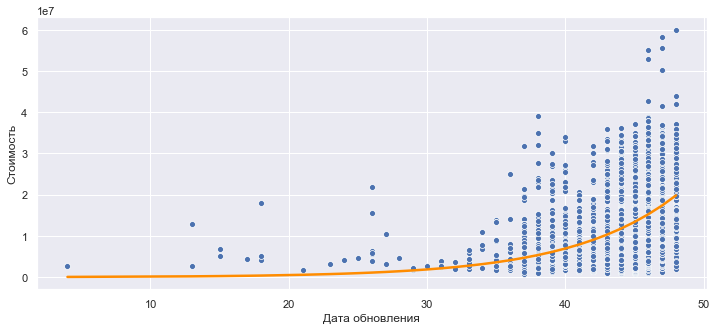

In [205]:
# Approximate inflation. Start date 2016-01-01

# import scipy


selected_date = cian_data_filled['Дата обновления']
selected_month_year = (selected_date.dt.year - 2016) * 12 + selected_date.dt.month
selected_price = cian_data_filled['Стоимость']


def fit_month_year(x, a, b):
    
    """Inflation approximation 
    S[n] = a * ((1 + alpha)**n - 1) / (alpha)
    """ 
    
    return a * b ** (x)

# p0 = (1, 1)
# pars, _ = scipy.optimize.curve_fit(
#     fit_month_year, selected_month_year,  
#     selected_price, p0=p0)
# print(pars)


pars = [3.68183589e+04, 1.14e+00]

plt.figure(figsize=(12,5))
sns.scatterplot(selected_month_year, selected_price)
ax = sns.lineplot(
    selected_month_year,
    fit_month_year(selected_month_year, *pars),
    color='darkorange',
    linewidth=2.5)
ax.set_ylabel('Стоимость')

#### Look at categorical features

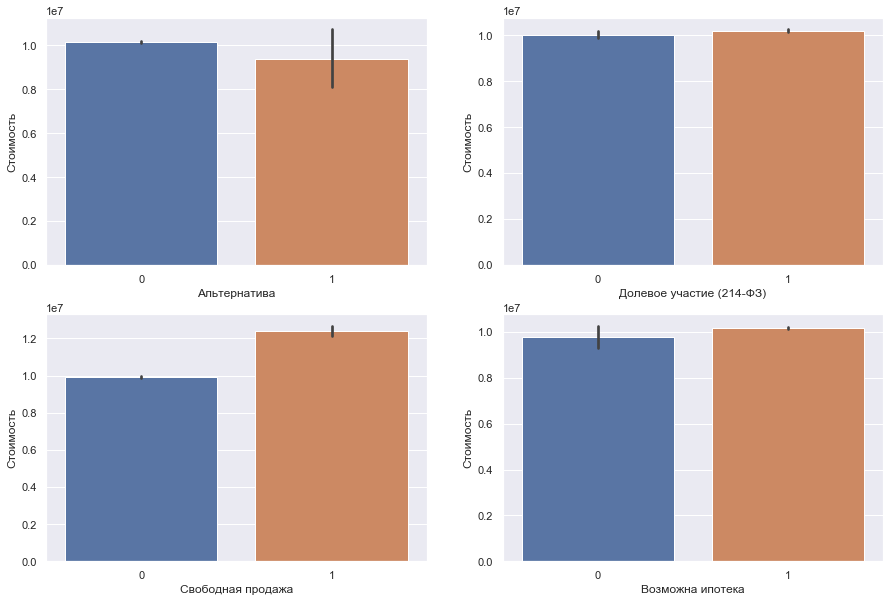

In [206]:
fig, axes = plt.subplots(2,2, figsize = (15, 10))
sns.barplot(data=cian_data_filled, x='Альтернатива', y="Стоимость", ax=axes[0][0])
sns.barplot(data=cian_data_filled, x='Долевое участие (214-ФЗ)', y="Стоимость", ax=axes[0][1])
sns.barplot(data=cian_data_filled, x='Свободная продажа', y="Стоимость", ax=axes[1][0])
sns.barplot(data=cian_data_filled, x='Возможна ипотека', y="Стоимость", ax=axes[1][1])

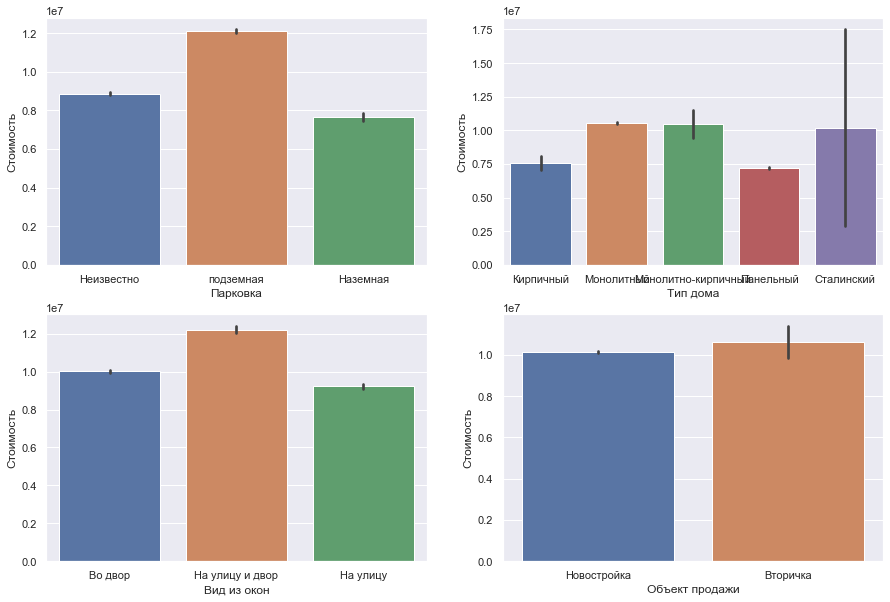

In [207]:
fig, axes = plt.subplots(2,2, figsize = (15, 10))
sns.barplot(data=cian_data_filled, x='Парковка', y="Стоимость", ax=axes[0][0])
sns.barplot(data=cian_data_filled, x='Тип дома', y="Стоимость", ax=axes[0][1])
sns.barplot(data=cian_data_filled, x='Вид из окон', y="Стоимость", ax=axes[1][0])
sns.barplot(data=cian_data_filled, x='Объект продажи', y="Стоимость", ax=axes[1][1])

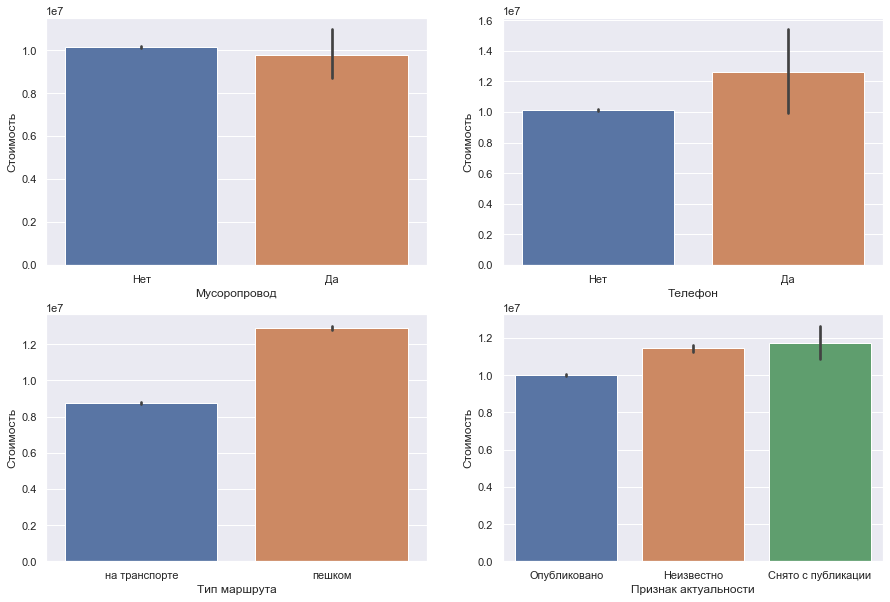

In [208]:
fig, axes = plt.subplots(2,2, figsize = (15, 10))
sns.barplot(data=cian_data_filled, x='Мусоропровод', y="Стоимость", ax=axes[0][0])
sns.barplot(data=cian_data_filled, x='Телефон', y="Стоимость", ax=axes[0][1])
sns.barplot(data=cian_data_filled, x='Тип маршрута', y="Стоимость", ax=axes[1][0])
sns.barplot(data=cian_data_filled, x='Признак актуальности', y="Стоимость", ax=axes[1][1])

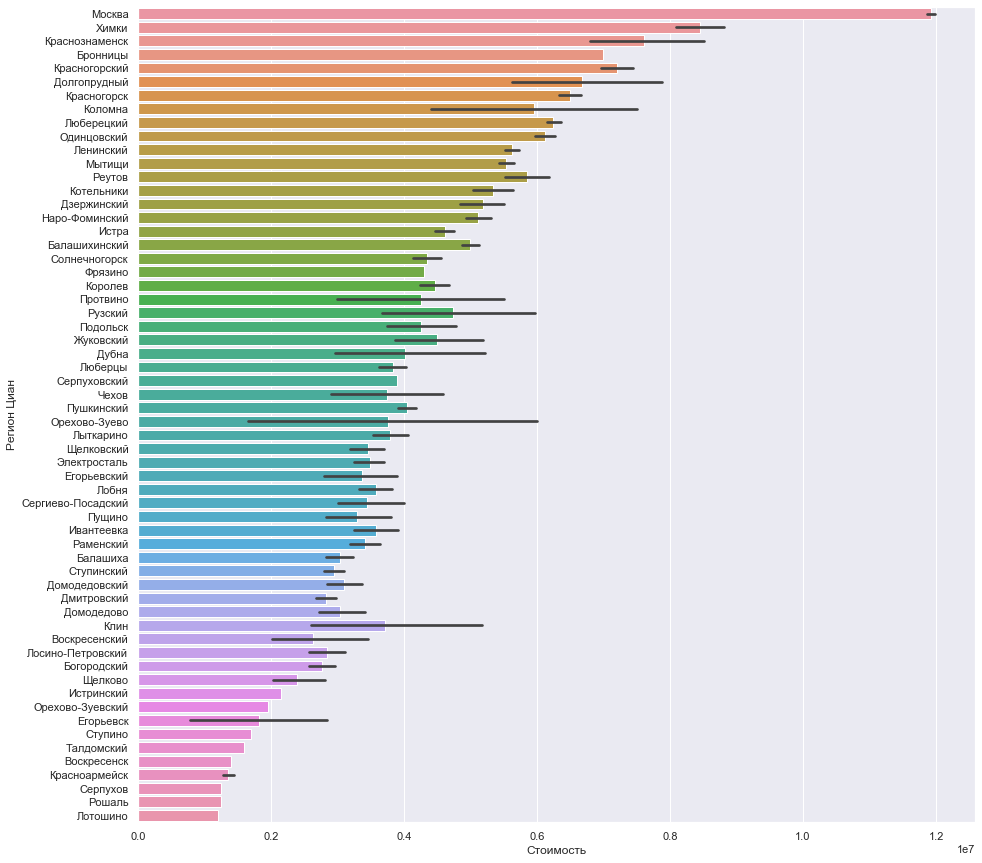

In [209]:
plt.figure(figsize=(15,15))

order_regions = (cian_data_filled.groupby(['Регион Циан'])['Стоимость']
                 .aggregate(np.median)
                 .reset_index()
                 .sort_values('Стоимость', ascending=False))
sns.barplot(data=cian_data_filled, x='Стоимость', y='Регион Циан', 
            order=order_regions['Регион Циан'])

In [210]:
cian_data_filled.select_dtypes(include=object).head().T

,0,1,2,3,4
Парковка,Неизвестно,подземная,подземная,Неизвестно,подземная
Тип дома,Кирпичный,Монолитный,Монолитный,Монолитный,Монолитный
Название дома (ЖК),ЖК «Маяковского»,ЖК «Белая звезда»,ЖК «Белая звезда»,ЖК «Хорошевский»,ЖК «Рублевское предместье»
Вид из окон,Во двор,Во двор,Во двор,На улицу и двор,На улицу и двор
ФИО продавца,Другое,ИНКОМ-Новостройки,ИНКОМ-Новостройки,Другое,Другое
Тип маршрута,на транспорте,на транспорте,на транспорте,на транспорте,на транспорте
Объект продажи,Новостройка,Новостройка,Новостройка,Новостройка,Новостройка
Мусоропровод,Нет,Да,Да,Нет,Нет
Телефон,Нет,Нет,Нет,Нет,Нет
Адрес,"Московская область,Богородский городской округ...","Москва,НАО (Новомосковский),Щербинка,улица 40 ...","Москва,НАО (Новомосковский),Щербинка,улица 40 ...","Москва,СЗАО,район Хорошево-Мневники,3-я Хороше...","Московская область,Красногорск городской округ..."


#### Save and read

In [211]:
cian_data_filled.to_csv('cian_data_filled_prepared.csv')

In [212]:
# Read
cian_data_filled = pd.read_csv('cian_data_filled_prepared.csv', index_col=0)


# Convert to datetime type

cian_data_filled['Дата обновления'] = pd.to_datetime(cian_data_filled['Дата обновления'])

### Add geopositions

In [130]:
# !pip install geopy

In [213]:
# Prepare adress, without streets
# cian_data_filled['Адрес']

def cut_last_part(string):
    return ','.join(string.split(',')[:-1])
    
# cian_data_adress_cut = cian_data_filled['Адрес'].map(cut_last_part)

In [104]:
# !!! It can take 3-4 hours !!!

# from geopy.geocoders import Nominatim


# def get_location(adress):
#     geolocator = Nominatim(user_agent="tutorial")
#     try:
#         location = geolocator.geocode(adress).raw
#         return float(location['lat']), float(location['lon']) 
#     except:
#         print(f'ERROR for {adress}')
#         return get_location(cut_last_part(adress))

In [105]:
# cian_data_locations = cian_data_adress_cut.map(get_location)

In [214]:
cian_data_locations

,latitude,longitude,distance
0,55.719461,38.217599,0.363475
1,55.511170,37.568496,0.060314
2,55.511170,37.568496,0.060314
3,55.781553,37.439220,0.031971
4,55.773611,37.254167,0.131092
...,...,...,...
37395,55.826054,37.114464,0.256591
37396,55.826054,37.114464,0.256591
37397,55.830954,37.146509,0.226249
37398,55.803622,37.964649,0.124479


In [125]:
# cian_data_locations.to_csv('locations.csv')

In [215]:
cian_data_locations = pd.read_csv('locations.csv', index_col=[0])

In [217]:
cian_data_locations.head()

,latitude,longitude,distance
0,55.719461,38.217599,0.363475
1,55.511170,37.568496,0.060314
2,55.511170,37.568496,0.060314
3,55.781553,37.439220,0.031971
4,55.773611,37.254167,0.131092


In [218]:
# cian_data_locations = (cian_data_locations['Адрес']
#      .str.strip('()')
#      .str.split(',', expand=True).astype(float))

# cian_data_locations.columns = ['latitude', 'longitude']

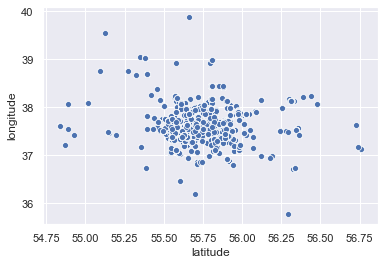

In [219]:
sns.scatterplot(cian_data_locations['latitude'], 
                cian_data_locations['longitude'])

In [220]:
lat_center = 55.7522
lng_center = 37.6156

def get_distance(latitude, longitude, lat_center=lat_center, 
                 lng_center=lng_center):
    distance = ((latitude - lat_center)**2 + 
                (longitude - lng_center)**2)
    return distance

In [221]:
lat_center = 55.7522 
lng_center = 37.6156
cian_data_locations = cian_data_locations.assign(
    distance=get_distance(cian_data_locations['latitude'], 
                          cian_data_locations['longitude']))

In [222]:
cian_data_filled = cian_data_filled.join(cian_data_locations)
cian_data_filled.head()

,Альтернатива,Долевое участие (214-ФЗ),Свободная продажа,Возможна ипотека,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Лифт пассажирский (кол-во),...,Мусоропровод,Телефон,Адрес,Признак актуальности,Дата обновления,Регион Циан,Цена от времени,latitude,longitude,distance
0,0,0,1,1,42.20,19.9,11.0,2,3,0.0,...,Нет,Нет,"Московская область,Богородский городской округ...",Опубликовано,2019-08-10 13:56:39,Богородский,5.006190e+06,55.719461,38.217599,0.363475
1,0,0,0,1,70.03,41.8,13.7,2,17,1.0,...,Да,Нет,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Опубликовано,2019-11-10 09:25:04,Москва,8.177728e+06,55.511170,37.568496,0.060314
2,0,0,0,1,76.47,43.4,11.2,11,17,1.0,...,Да,Нет,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Опубликовано,2019-11-10 06:45:06,Москва,8.177728e+06,55.511170,37.568496,0.060314
3,0,0,0,0,60.00,38.0,12.0,5,20,2.0,...,Нет,Нет,"Москва,СЗАО,район Хорошево-Мневники,3-я Хороше...",Опубликовано,2019-11-10 16:30:13,Москва,1.759487e+07,55.781553,37.439220,0.031971
4,0,0,0,1,65.20,51.4,13.8,2,5,0.0,...,Нет,Нет,"Московская область,Красногорск городской округ...",Опубликовано,2019-09-10 19:10:04,Красногорск,5.007500e+06,55.773611,37.254167,0.131092


### OneHot encoding

In [223]:
# We are sure we will not see new types of these features

onehot_features = ['Парковка', 'Тип дома', 'Вид из окон', 
                   'Тип маршрута', 'Объект продажи', 'Мусоропровод',
                   'Телефон', 'Признак актуальности']

In [224]:
# Join transformed and drop original features

cian_data_filled = pd.concat((
    cian_data_filled.drop(onehot_features, axis=1), 
    pd.get_dummies(cian_data_filled[onehot_features])),
    axis=1
)

In [225]:
cian_data_filled.columns

Index(['Альтернатива', 'Долевое участие (214-ФЗ)', 'Свободная продажа',
       'Возможна ипотека', 'Общая площадь', 'Жилая площадь', 'Площадь кухни',
       'Этаж', 'Этажей в доме', 'Лифт пассажирский (кол-во)',
       'Лифт грузовой (кол-во)', 'Количество комнат', 'Высота потолков',
       'Кол-во раздельных санузлов', 'Стоимость', 'Название дома (ЖК)',
       'ФИО продавца', 'Время до метро', 'Пропущено время', 'Адрес',
       'Дата обновления', 'Регион Циан', 'Цена от времени', 'latitude',
       'longitude', 'distance', 'Парковка_Наземная', 'Парковка_Неизвестно',
       'Парковка_подземная', 'Тип дома_Кирпичный',
       'Тип дома_Монолитно-кирпичный', 'Тип дома_Монолитный',
       'Тип дома_Панельный', 'Тип дома_Сталинский', 'Вид из окон_Во двор',
       'Вид из окон_На улицу', 'Вид из окон_На улицу и двор',
       'Тип маршрута_на транспорте', 'Тип маршрута_пешком',
       'Объект продажи_Вторичка', 'Объект продажи_Новостройка',
       'Мусоропровод_Да', 'Мусоропровод_Нет', 'Телеф

### Another categorical encoding

#### Look at another categorical features

In [226]:
cian_data_filled.select_dtypes(include=object).head()

,Название дома (ЖК),ФИО продавца,Адрес,Регион Циан
0,ЖК «Маяковского»,Другое,"Московская область,Богородский городской округ...",Богородский
1,ЖК «Белая звезда»,ИНКОМ-Новостройки,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Москва
2,ЖК «Белая звезда»,ИНКОМ-Новостройки,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Москва
3,ЖК «Хорошевский»,Другое,"Москва,СЗАО,район Хорошево-Мневники,3-я Хороше...",Москва
4,ЖК «Рублевское предместье»,Другое,"Московская область,Красногорск городской округ...",Красногорск


In [227]:
cian_data_filled.select_dtypes(include=object).describe()

,Название дома (ЖК),ФИО продавца,Адрес,Регион Циан
count,37299,37299,37299,37299
unique,774,1145,2335,60
top,ЖК «Хорошевский»,ПИК,"Москва,НАО (Новомосковский),Родниковая улица",Москва
freq,1158,6198,703,26674


In [228]:
cian_data_filled.shape

(37299, 48)

#### Add year and month as features. Combining feature started from 2016-01-01

In [229]:
cian_data_filled_year = cian_data_filled['Дата обновления'].dt.year
cian_data_filled_month = cian_data_filled['Дата обновления'].dt.month
cian_data_filled_months = (
    (cian_data_filled['Дата обновления'].dt.year - 2016) * 12 + 
    cian_data_filled['Дата обновления'].dt.month)

cian_data_filled_year.name = 'Год'
cian_data_filled_month.name = 'Месяц'
cian_data_filled_months.name = 'Кол-во месяцев'

cian_data_filled = pd.concat((cian_data_filled,cian_data_filled_year, 
    cian_data_filled_month, cian_data_filled_months), axis=1)

In [233]:
cian_data_filled.head()

,Альтернатива,Долевое участие (214-ФЗ),Свободная продажа,Возможна ипотека,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Лифт пассажирский (кол-во),...,Мусоропровод_Да,Мусоропровод_Нет,Телефон_Да,Телефон_Нет,Признак актуальности_Cнято с публикации,Признак актуальности_Неизвестно,Признак актуальности_Опубликовано,Год,Месяц,Кол-во месяцев
0,0,0,1,1,42.20,19.9,11.0,2,3,0.0,...,0,1,0,1,0,0,1,2019,8,44
1,0,0,0,1,70.03,41.8,13.7,2,17,1.0,...,1,0,0,1,0,0,1,2019,11,47
2,0,0,0,1,76.47,43.4,11.2,11,17,1.0,...,1,0,0,1,0,0,1,2019,11,47
3,0,0,0,0,60.00,38.0,12.0,5,20,2.0,...,0,1,0,1,0,0,1,2019,11,47
4,0,0,0,1,65.20,51.4,13.8,2,5,0.0,...,0,1,0,1,0,0,1,2019,9,45


#### Save and read

In [234]:
cian_data_filled.to_csv('cian_data_encoded_onehot.csv')

In [281]:
cian_data_filled = pd.read_csv('cian_data_encoded_onehot.csv', index_col=0)

# Convert to datetime type
# cian_data_filled['Дата обновления'] = pd.to_datetime(cian_data_filled['Дата обновления'])

#### It is necessary to split at first. Split by date.

In [282]:
def get_data_splits(dataframe, valid_fraction=0.1, order='Дата обновления'):
    """Splits a dataframe into train, validation, and test sets.

    First, orders by the column 'click_time'. Set the size of the 
    validation and test sets with the valid_fraction keyword argument.
    """

    dataframe = dataframe.sort_values(order)
    valid_rows = int(len(dataframe) * valid_fraction)
    train = dataframe[:-valid_rows * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_rows * 2:-valid_rows]
    test = dataframe[-valid_rows:]
    
    return train, valid, test

In [283]:
x_train, x_valid, x_test = get_data_splits(cian_data_filled)

y_train = x_train['Стоимость']
y_valid = x_valid['Стоимость']
y_test = x_test['Стоимость']

x_train = x_train.drop(['Стоимость'], axis=1)
x_valid = x_valid.drop(['Стоимость'], axis=1)
x_test = x_test.drop(['Стоимость'], axis=1)

In [284]:
# Drop also the date time, year and month will be enough

x_train = x_train.drop('Дата обновления', axis=1)
x_valid = x_valid.drop('Дата обновления', axis=1)
x_test = x_test.drop('Дата обновления', axis=1)

#### Define functions for feature encoding

In [285]:
def feature_encoding(features, encoder, x_train, x_valid, x_test, 
                     y_train=None, *args, **kwargs):
    
    encoder = encoder(*args, **kwargs)
    if y_train is not None:
        encoder.fit(x_train[features], y_train)
    else:
        encoder.fit(x_train[features])
    
    cols_train = pd.DataFrame(encoder.transform(x_train[features]))    
    cols_train.index = x_train[features].index
    cols_train.columns = x_train[features].columns

    cols_valid = pd.DataFrame(encoder.transform(x_valid[features]))
    cols_valid.index = x_valid[features].index
    cols_valid.columns = x_valid[features].columns

    cols_test = pd.DataFrame(encoder.transform(x_test[features]))
    cols_test.index = x_test[features].index
    cols_test.columns = x_test[features].columns
    
    return cols_train, cols_valid, cols_test
    
    
def join_features(x_train, x_valid, x_test,
                  cols_train, cols_valid, cols_test):
    
    x_train_ = x_train.drop(target_cols_train.columns, axis=1).join(target_cols_train)
    x_valid_ = x_valid.drop(target_cols_valid.columns, axis=1).join(target_cols_valid)
    x_test_ = x_test.drop(target_cols_test.columns, axis=1).join(target_cols_test)
    
    return x_train_, x_valid_, x_test_

#### Target Encoding

In [286]:
target_features = ['Название дома (ЖК)', 'ФИО продавца', 'Адрес', 'Регион Циан']

target_cols_train, target_cols_valid, target_cols_test = (
    feature_encoding(
        target_features, TargetEncoder, x_train, x_valid, 
        x_test, y_train=y_train))

x_train, x_valid, x_test = (
    join_features(
        x_train, x_valid, x_test, 
        target_cols_train, target_cols_valid, target_cols_test))

In [287]:
x_train[target_features]

,Название дома (ЖК),ФИО продавца,Адрес,Регион Циан
37387,3.043887e+06,8.767405e+06,4.579366e+06,3.043887e+06
37389,2.105186e+06,2.334415e+06,2.105186e+06,4.215702e+06
20,9.553457e+06,8.767405e+06,9.553457e+06,7.027971e+06
36,5.437729e+06,8.767405e+06,5.437729e+06,4.582865e+06
56,5.437729e+06,4.481116e+06,5.437729e+06,4.582865e+06
...,...,...,...,...
14035,1.721913e+07,1.560333e+07,1.279929e+07,1.138294e+07
843,6.604918e+06,8.767405e+06,6.604918e+06,7.027971e+06
10758,7.959246e+06,8.360222e+06,7.538459e+06,1.138294e+07
24684,1.291645e+07,1.066925e+07,1.222965e+07,1.138294e+07


In [288]:
print(x_train.nunique()[x_train.nunique() > 2].drop(target_features))

Общая площадь                 4048
Жилая площадь                 1894
Площадь кухни                  358
Этаж                            67
Этажей в доме                   63
Лифт пассажирский (кол-во)      11
Лифт грузовой (кол-во)          11
Количество комнат                6
Высота потолков                 57
Кол-во раздельных санузлов       5
Время до метро                 118
Цена от времени                167
latitude                       625
longitude                      625
distance                       625
Год                              4
Месяц                           12
Кол-во месяцев                  31
dtype: int64


#### Count Encoding

In [289]:
# count_features = ['Название дома (ЖК)', 'ФИО продавца', 'Адрес', 'Регион Циан']

# count_cols_train, count_cols_valid, count_cols_test = (
#     feature_encoding(
#         count_features, CountEncoder, x_train, x_valid, 
#         x_test, y_train=y_train))

# x_train, x_valid, x_test = (
#     join_features(
#         x_train, x_valid, x_test, 
#         count_cols_train, count_cols_valid, count_cols_test))

#### Scale encoding

In [290]:
# scaled_features = ['Общая площадь', 'Жилая площадь', 'Площадь кухни', 'Время до метро',
#        'Цена от времени', 'Год', 'Месяц', 'Этаж', 'Этажей в доме',
#        'Лифт пассажирский (кол-во)', 'Лифт грузовой (кол-во)',
#        'Количество комнат', 'Высота потолков', 'Кол-во раздельных санузлов']

# scaled_cols_train, scaled_cols_valid, scaled_cols_test = (
#     feature_encoding(
#         scaled_features, StandardScaler, x_train, x_valid, x_test))

# x_train, x_valid, x_test = (
#     join_features(
#         x_train, x_valid, x_test, 
#         scaled_cols_train, scaled_cols_valid, scaled_cols_test))

#### Normalize

In [291]:
# from sklearn.preprocessing import Normalizer


# norm_features = ['Общая площадь', 'Жилая площадь', 'Площадь кухни', 'Время до метро',
#        'Цена от времени', 'Год', 'Месяц', 'Этаж', 'Этажей в доме',
#        'Лифт пассажирский (кол-во)', 'Лифт грузовой (кол-во)',
#        'Количество комнат', 'Высота потолков', 'Кол-во раздельных санузлов']

# norm_cols_train, norm_cols_valid, norm_cols_test = (
#     feature_encoding(
#         norm_features, Normalizer, x_train, x_valid, x_test))

# x_train, x_valid, x_test = (
#     join_features(
#         x_train, x_valid, x_test, 
#         norm_cols_train, norm_cols_valid, norm_cols_test))

#### MinMax encoding

In [292]:
# minmax_features = ['Этаж', 'Этажей в доме', 'Лифт пассажирский (кол-во)', 
# 'Лифт грузовой (кол-во)', 'Количество комнат', 
# 'Высота потолков', 'Кол-во раздельных санузлов']

# minmax_cols_train, minmax_cols_valid, minmax_cols_test = (
#     feature_encoding(
#         minmax_features, MinMaxScaler, x_train, x_valid, x_test))

# x_train, x_valid, x_test = (
#     join_features(
#         x_train, x_valid, x_test, 
#         minmax_cols_train, minmax_cols_valid, minmax_cols_test))

In [293]:
# Check

x_train.shape, x_valid.shape, x_test.shape

((29841, 49), (3729, 49), (3729, 49))

In [294]:
# Check

y_train.shape, y_valid.shape, y_test.shape

((29841,), (3729,), (3729,))

In [295]:
x_train.head()

,Альтернатива,Долевое участие (214-ФЗ),Свободная продажа,Возможна ипотека,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Лифт пассажирский (кол-во),...,Признак актуальности_Cнято с публикации,Признак актуальности_Неизвестно,Признак актуальности_Опубликовано,Год,Месяц,Кол-во месяцев,Название дома (ЖК),ФИО продавца,Адрес,Регион Циан
37387,0,0,0,0,41.9,19.0,9.0,15,16,2.0,...,0,0,1,2016,4,4,3.043887e+06,8.767405e+06,4.579366e+06,3.043887e+06
37389,0,0,0,0,64.9,32.5,11.0,7,7,1.0,...,0,0,1,2017,1,13,2.105186e+06,2.334415e+06,2.105186e+06,4.215702e+06
20,0,0,1,0,106.0,81.0,15.0,2,23,1.0,...,0,0,1,2017,1,13,9.553457e+06,8.767405e+06,9.553457e+06,7.027971e+06
36,0,0,0,1,59.1,26.0,13.0,2,4,1.0,...,0,0,1,2017,3,15,5.437729e+06,8.767405e+06,5.437729e+06,4.582865e+06
56,0,0,0,1,71.0,33.9,13.8,4,4,1.0,...,0,0,1,2017,3,15,5.437729e+06,4.481116e+06,5.437729e+06,4.582865e+06


#### Last preparing

In [296]:
# Select features features

selected_cols = x_train.columns

x_train_encoded = x_train[selected_cols]
x_valid_encoded = x_valid[selected_cols]
x_test_encoded = x_test[selected_cols]

In [297]:
x_train_encoded

,Альтернатива,Долевое участие (214-ФЗ),Свободная продажа,Возможна ипотека,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Лифт пассажирский (кол-во),...,Признак актуальности_Cнято с публикации,Признак актуальности_Неизвестно,Признак актуальности_Опубликовано,Год,Месяц,Кол-во месяцев,Название дома (ЖК),ФИО продавца,Адрес,Регион Циан
37387,0,0,0,0,41.90,19.00,9.0,15,16,2.0,...,0,0,1,2016,4,4,3.043887e+06,8.767405e+06,4.579366e+06,3.043887e+06
37389,0,0,0,0,64.90,32.50,11.0,7,7,1.0,...,0,0,1,2017,1,13,2.105186e+06,2.334415e+06,2.105186e+06,4.215702e+06
20,0,0,1,0,106.00,81.00,15.0,2,23,1.0,...,0,0,1,2017,1,13,9.553457e+06,8.767405e+06,9.553457e+06,7.027971e+06
36,0,0,0,1,59.10,26.00,13.0,2,4,1.0,...,0,0,1,2017,3,15,5.437729e+06,8.767405e+06,5.437729e+06,4.582865e+06
56,0,0,0,1,71.00,33.90,13.8,4,4,1.0,...,0,0,1,2017,3,15,5.437729e+06,4.481116e+06,5.437729e+06,4.582865e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,0,1,0,1,141.92,88.20,14.4,14,22,1.0,...,0,0,1,2019,11,47,1.721913e+07,1.560333e+07,1.279929e+07,1.138294e+07
843,0,1,0,0,62.40,32.70,13.8,3,8,1.0,...,0,0,1,2019,11,47,6.604918e+06,8.767405e+06,6.604918e+06,7.027971e+06
10758,0,1,0,1,42.20,16.50,13.3,14,16,1.0,...,0,0,1,2019,11,47,7.959246e+06,8.360222e+06,7.538459e+06,1.138294e+07
24684,0,1,0,1,68.89,44.99,23.9,12,19,1.0,...,0,0,1,2019,11,47,1.291645e+07,1.066925e+07,1.222965e+07,1.138294e+07


In [298]:
# Min-Max scaler for for all features improved the scores

from sklearn.preprocessing import MinMaxScaler


minmax_features = x_train_encoded.columns

x_train_encoded, x_valid_encoded, x_test_encoded = (
    feature_encoding(
        minmax_features, MinMaxScaler, x_train_encoded, x_valid_encoded, x_test_encoded))

In [299]:
x_train_encoded

,Альтернатива,Долевое участие (214-ФЗ),Свободная продажа,Возможна ипотека,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Этажей в доме,Лифт пассажирский (кол-во),...,Признак актуальности_Cнято с публикации,Признак актуальности_Неизвестно,Признак актуальности_Опубликовано,Год,Месяц,Кол-во месяцев,Название дома (ЖК),ФИО продавца,Адрес,Регион Циан
37387,0.0,0.0,0.0,0.0,0.106567,0.093780,0.159046,0.177215,0.147368,0.133333,...,0.0,0.0,1.0,0.000000,0.272727,0.000000,0.039480,0.205939,0.093093,0.166318
37389,0.0,0.0,0.0,0.0,0.192871,0.159378,0.198807,0.075949,0.052632,0.066667,...,0.0,0.0,1.0,0.333333,0.000000,0.209302,0.011201,0.002260,0.019156,0.283468
20,0.0,0.0,1.0,0.0,0.347092,0.395044,0.278330,0.012658,0.221053,0.066667,...,0.0,0.0,1.0,0.333333,0.000000,0.209302,0.235586,0.205939,0.241735,0.564620
36,0.0,0.0,0.0,1.0,0.171107,0.127794,0.238569,0.012658,0.021053,0.066667,...,0.0,0.0,1.0,0.333333,0.181818,0.255814,0.111596,0.205939,0.118744,0.320175
56,0.0,0.0,0.0,1.0,0.215760,0.166181,0.254473,0.037975,0.021053,0.066667,...,0.0,0.0,1.0,0.333333,0.181818,0.255814,0.111596,0.070228,0.118744,0.320175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,0.0,1.0,0.0,1.0,0.481876,0.430029,0.266402,0.164557,0.210526,0.066667,...,0.0,0.0,1.0,1.000000,0.909091,1.000000,0.466519,0.422377,0.338732,1.000000
843,0.0,1.0,0.0,0.0,0.183490,0.160350,0.254473,0.025316,0.063158,0.066667,...,0.0,0.0,1.0,1.000000,0.909091,1.000000,0.146759,0.205939,0.153623,0.564620
10758,0.0,1.0,0.0,1.0,0.107692,0.081633,0.244533,0.164557,0.147368,0.066667,...,0.0,0.0,1.0,1.000000,0.909091,1.000000,0.187559,0.193047,0.181520,1.000000
24684,0.0,1.0,0.0,1.0,0.207842,0.220068,0.455268,0.139241,0.178947,0.066667,...,0.0,0.0,1.0,1.000000,0.909091,1.000000,0.336898,0.266155,0.321709,1.000000


#### Select top features

In [300]:
# Some features with low variance can be dropped

from sklearn.feature_selection import VarianceThreshold


variance_threshold = VarianceThreshold(0.2)

variance_features = variance_threshold.fit(x_train).get_support(indices=False)
best_features = [x_train.columns[index] for index, value 
                 in enumerate(variance_features) if value]

num_of_best_features = len(best_features)

print(f'Number of the features = {num_of_best_features} \n')
print('All features:\n', x_train.columns.to_list(), '\n')
print(f'{num_of_best_features} best features:\n', best_features)

Number of the features = 21 

All features:
 ['Альтернатива', 'Долевое участие (214-ФЗ)', 'Свободная продажа', 'Возможна ипотека', 'Общая площадь', 'Жилая площадь', 'Площадь кухни', 'Этаж', 'Этажей в доме', 'Лифт пассажирский (кол-во)', 'Лифт грузовой (кол-во)', 'Количество комнат', 'Высота потолков', 'Кол-во раздельных санузлов', 'Время до метро', 'Пропущено время', 'Цена от времени', 'latitude', 'longitude', 'distance', 'Парковка_Наземная', 'Парковка_Неизвестно', 'Парковка_подземная', 'Тип дома_Кирпичный', 'Тип дома_Монолитно-кирпичный', 'Тип дома_Монолитный', 'Тип дома_Панельный', 'Тип дома_Сталинский', 'Вид из окон_Во двор', 'Вид из окон_На улицу', 'Вид из окон_На улицу и двор', 'Тип маршрута_на транспорте', 'Тип маршрута_пешком', 'Объект продажи_Вторичка', 'Объект продажи_Новостройка', 'Мусоропровод_Да', 'Мусоропровод_Нет', 'Телефон_Да', 'Телефон_Нет', 'Признак актуальности_Cнято с публикации', 'Признак актуальности_Неизвестно', 'Признак актуальности_Опубликовано', 'Год', 'Месяц',

In [301]:
# Select features manually

drop_cols = ['Жилая площадь', 'Площадь кухни', 'ФИО продавца']
join_cols = ['Кол-во месяцев', 'latitude', 'longitude', 'distance']

x_train_encoded = x_train_encoded[best_features + join_cols].drop(drop_cols, axis=1)
x_valid_encoded = x_valid_encoded[best_features + join_cols].drop(drop_cols, axis=1)
x_test_encoded = x_test_encoded[best_features + join_cols].drop(drop_cols, axis=1)

In [302]:
x_train_encoded.head()

,Общая площадь,Этаж,Этажей в доме,Лифт пассажирский (кол-во),Лифт грузовой (кол-во),Количество комнат,Кол-во раздельных санузлов,Время до метро,Цена от времени,Парковка_Неизвестно,...,Тип маршрута_пешком,Месяц,Кол-во месяцев,Название дома (ЖК),Адрес,Регион Циан,Кол-во месяцев,latitude,longitude,distance
37387,0.106567,0.177215,0.147368,0.133333,0.066667,0.0,0.00,0.152542,6.118086e-02,0.0,...,0.0,0.272727,0.000000,0.039480,0.093093,0.166318,0.000000,0.478155,0.553933,0.036822
37389,0.192871,0.075949,0.052632,0.066667,0.000000,0.2,0.25,0.593220,2.911175e-06,1.0,...,0.0,0.000000,0.209302,0.011201,0.019156,0.283468,0.209302,0.668818,0.296236,0.102389
20,0.347092,0.012658,0.221053,0.066667,0.066667,0.4,0.25,0.237288,4.137061e-01,0.0,...,1.0,0.000000,0.209302,0.235586,0.241735,0.564620,0.209302,0.511875,0.380563,0.015799
36,0.171107,0.012658,0.021053,0.066667,0.000000,0.2,0.25,0.406780,1.988512e-04,1.0,...,0.0,0.181818,0.255814,0.111596,0.118744,0.320175,0.255814,0.507984,0.318786,0.055354
56,0.215760,0.037975,0.021053,0.066667,0.000000,0.2,0.00,0.788136,3.488822e-08,1.0,...,0.0,0.181818,0.255814,0.111596,0.118744,0.320175,0.255814,0.507984,0.318786,0.055354


### Try different models

In [303]:
def evaluate(y_true, y_predicted):
    mae = metrics.mean_absolute_error(y_true, y_predicted)
    mse = metrics.mean_squared_error(y_true, y_predicted)
    rmse = np.sqrt(metrics.mean_squared_error(y_true, y_predicted))
    r2_square = metrics.r2_score(y_true, y_predicted)
    return mae, mse, rmse, r2_square

def predict(model, x_train, y_train, x_test, args=[], kwargs=dict()):
    predict_model = model(*args, **kwargs)
    predict_model.fit(x_train, y_train)
    y_pred = predict_model.predict(x_test)
    return y_pred

def compare_models(x_train, y_train, x_test, y_test, models, 
                   args=[], kwargs=dict(), show=True):
    df_scores = pd.DataFrame(columns=['model', 'mae', 'mse', 'rmse', 'r2_square'])
    for model in models:
        y_pred = predict(model, x_train, y_train, x_test, *args, **kwargs)
        results_append = pd.DataFrame(data=[[model.__name__, *evaluate(y_test, y_pred)]], 
                                     columns=df_scores.columns)
        if show:
            ax = sns.distplot(y_test, hist=False, color='r', label='Actual value')
            sns.distplot(y_pred, hist=False, color='b', label='Predicted value', ax=ax)
            ax.set(title=model.__name__)
            plt.show()

        df_scores = df_scores.append(results_append, ignore_index = True)
        print(f'{model.__name__} finished')
        
    return df_scores

In [304]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

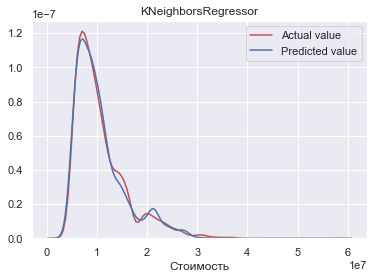

KNeighborsRegressor finished


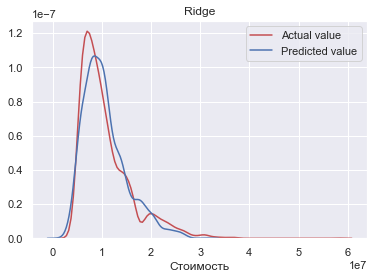

Ridge finished


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7162209426318872.0, tolerance: 85122089536162.12
  positive)


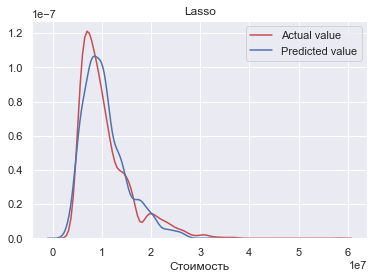

Lasso finished


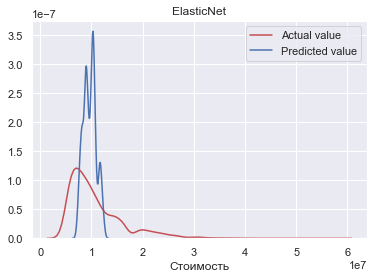

ElasticNet finished


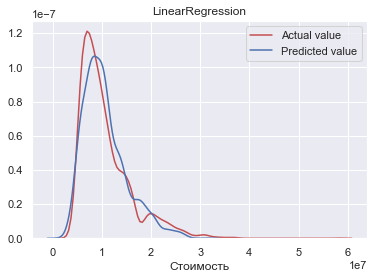

LinearRegression finished


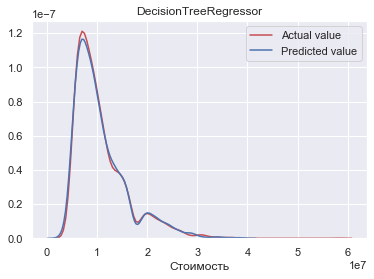

DecisionTreeRegressor finished


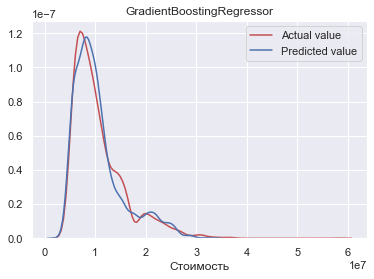

GradientBoostingRegressor finished


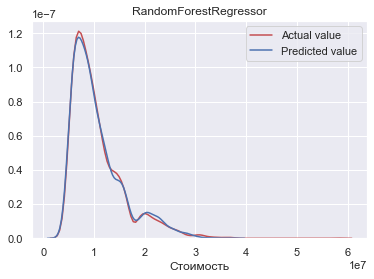

RandomForestRegressor finished


In [305]:
list_of_models = [
    KNeighborsRegressor, Ridge, Lasso, ElasticNet, LinearRegression, 
    DecisionTreeRegressor, GradientBoostingRegressor, RandomForestRegressor
]

df_scores = compare_models(x_train_encoded, y_train, 
    x_valid_encoded, y_valid, models=list_of_models)

In [306]:
df_scores

,model,mae,mse,rmse,r2_square
0,KNeighborsRegressor,1.050966e+06,4.114148e+12,2.028336e+06,0.851791
1,Ridge,1.406807e+06,5.346985e+12,2.312355e+06,0.807379
2,Lasso,1.405757e+06,5.331074e+12,2.308912e+06,0.807952
3,ElasticNet,3.167347e+06,2.269560e+13,4.763990e+06,0.182408
4,LinearRegression,1.405757e+06,5.331064e+12,2.308910e+06,0.807952
5,DecisionTreeRegressor,7.359416e+05,2.386894e+12,1.544958e+06,0.914014
6,GradientBoostingRegressor,1.048835e+06,3.198839e+12,1.788530e+06,0.884764
7,RandomForestRegressor,5.988499e+05,1.503760e+12,1.226279e+06,0.945828


#### Try on the test sample

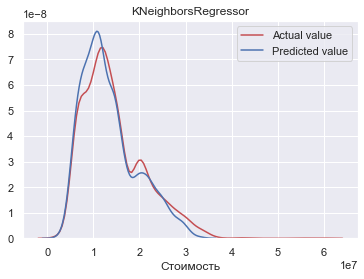

KNeighborsRegressor finished


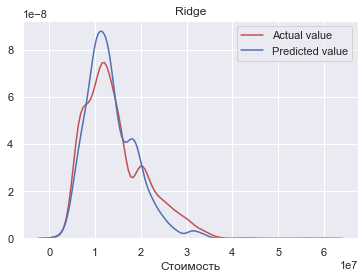

Ridge finished


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7162209426318872.0, tolerance: 85122089536162.12
  positive)


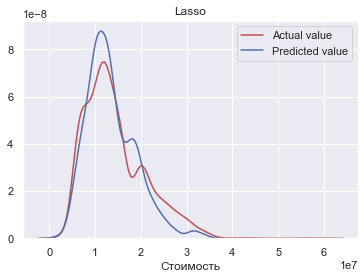

Lasso finished


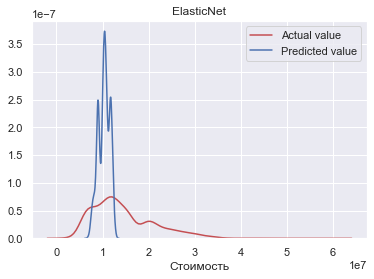

ElasticNet finished


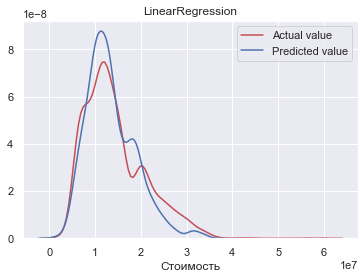

LinearRegression finished


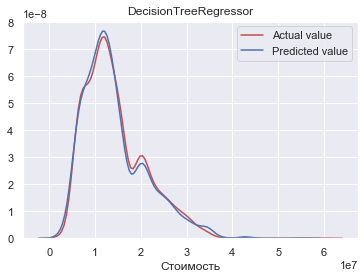

DecisionTreeRegressor finished


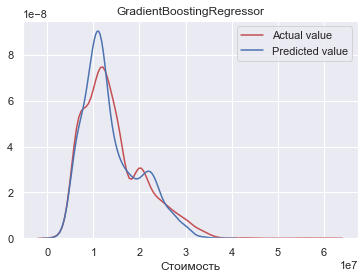

GradientBoostingRegressor finished


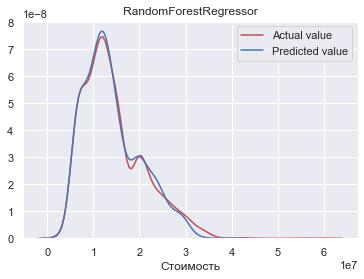

RandomForestRegressor finished


In [307]:
df_scores = compare_models(x_train_encoded, y_train, 
    x_test_encoded, y_test, models=list_of_models)

In [308]:
df_scores

,model,mae,mse,rmse,r2_square
0,KNeighborsRegressor,2.112390e+06,1.502097e+13,3.875690e+06,0.661701
1,Ridge,2.367446e+06,1.471424e+13,3.835915e+06,0.668609
2,Lasso,2.367678e+06,1.468927e+13,3.832659e+06,0.669172
3,ElasticNet,5.167182e+06,5.348973e+13,7.313668e+06,-0.204683
4,LinearRegression,2.367678e+06,1.468924e+13,3.832654e+06,0.669173
5,DecisionTreeRegressor,1.503191e+06,9.375998e+12,3.062025e+06,0.788836
6,GradientBoostingRegressor,1.810027e+06,9.376486e+12,3.062105e+06,0.788825
7,RandomForestRegressor,1.152958e+06,4.806215e+12,2.192308e+06,0.891756


#### Tune parameters of the best model

In [ ]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor()
param_grid = {
    "n_estimators": [100, 210],
    "min_samples_leaf": [2, 4, 8],
    "max_features": ["sqrt"],
    "min_samples_split" : [2, 6, 12],
    "max_depth": [5, 10, 17],
    "bootstrap": [True, False],
    }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=2)
grid.fit(x_train_choosen, y_train_choosen)

y_pred = grid.best_estimator_.predict(x_test_choosen)

print(
    metrics.mean_absolute_error(y_test_choosen, y_pred), '\n', 
    metrics.mean_squared_error(y_test_choosen, y_pred), '\n', 
    np.sqrt(metrics.mean_squared_error(y_test_choosen, y_pred)), '\n',
    metrics.r2_score(y_test_choosen, y_pred)
)